<a href="https://colab.research.google.com/github/Astrid-Marin-Olarte/Proyecto/blob/main/Proyecto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Librerias

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
import numpy as np
from sklearn import tree, datasets
import seaborn as sns

#DATOS

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/0-Maestría/2 Semestre/Métodos estadísticos (Nicolás Avilán Vargas)/Proyecto/Datos.xlsx')

####analisis exploratorio

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5389 entries, 0 to 5388
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    5389 non-null   int64  
 1   Código levantamiento  5389 non-null   int64  
 2   Ambiente              5389 non-null   int64  
 3   Altitud               5389 non-null   int64  
 4   Latitud               5389 non-null   float64
 5   Longitud              5389 non-null   float64
 6   ESPECIE               5389 non-null   object 
 7   ALTURA                5389 non-null   int64  
 8   CAP                   5389 non-null   float64
 9   DAP                   5389 non-null   float64
 10  AREA                  5389 non-null   float64
 11  ESTRATO               5389 non-null   int64  
 12  COPA1                 5389 non-null   int64  
 13  COPA2                 5389 non-null   int64  
 14  COBERTURA             5389 non-null   int64  
dtypes: float64(5), int64(

In [ ]:
df.head()

,ID,Código levantamiento,Ambiente,Altitud,Latitud,Longitud,ESPECIE,ALTURA,CAP,DAP,AREA,ESTRATO,COPA1,COPA2,COBERTURA
0,1,1,3,162,460096.0,7131754.0,Henriettea fissanthera,7,12.566371,4.0,0.001257,2,4,2,8
1,2,1,3,162,460096.0,7131754.0,Hieronyma alchorneoides,18,100.530965,32.0,0.080425,3,7,6,42
2,3,1,3,162,460096.0,7131754.0,Hieronyma alchorneoides,9,18.849556,6.0,0.002827,2,4,2,8
3,4,1,3,162,460096.0,7131754.0,Ficus nitidifolia,8,28.274334,9.0,0.006362,2,6,5,30
4,5,1,3,162,460096.0,7131754.0,Hieronyma alchorneoides,26,87.964594,28.0,0.061575,4,7,6,42


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5389.0,2.695000e+03,1.555815e+03,1.000000,1.348000e+03,2.695000e+03,4.042000e+03,5.389000e+03
Código levantamiento,5389.0,7.750789e+00,4.219926e+00,1.000000,4.000000e+00,8.000000e+00,1.000000e+01,1.700000e+01
Ambiente,5389.0,1.433290e+00,1.152550e+00,0.000000,0.000000e+00,1.000000e+00,2.000000e+00,3.000000e+00
Altitud,5389.0,1.591872e+02,1.440927e+01,120.000000,1.590000e+02,1.610000e+02,1.650000e+02,1.800000e+02
Latitud,5389.0,3.841113e+05,1.555322e+05,4360.180000,4.459810e+05,4.493100e+05,4.600960e+05,4.650170e+05
Longitud,5389.0,6.040860e+06,2.431799e+06,71190.760000,7.111833e+06,7.128848e+06,7.129877e+06,7.131754e+06
ALTURA,5389.0,9.163296e+00,5.828792e+00,1.000000,5.000000e+00,7.000000e+00,1.200000e+01,4.000000e+01
CAP,5389.0,2.982380e+01,2.825514e+01,3.000000,1.256637e+01,1.884956e+01,3.141593e+01,3.298672e+02
DAP,5389.0,9.493209e+00,8.993890e+00,0.954930,4.000000e+00,6.000000e+00,1.000000e+01,1.050000e+02
AREA,5389.0,1.343000e-02,3.357508e-02,0.000072,1.256637e-03,2.827433e-03,7.853982e-03,8.659015e-01


In [ ]:
df.columns

Index(['ID', 'Código levantamiento', 'Ambiente', 'Altitud', 'Latitud',
       'Longitud', 'ESPECIE', 'ALTURA', 'CAP', 'DAP', 'AREA', 'ESTRATO',
       'COPA1', 'COPA2', 'COBERTURA'],
      dtype='object')

In [ ]:
df=df.drop(['ID','Código levantamiento','Latitud','Longitud'], axis=1)

In [12]:
df = pd.DataFrame(df)

if df.isna().any().any():
    print("El DataFrame tiene al menos un valor NaN.")
else:
    print("El DataFrame no tiene ningún valor NaN.")

El DataFrame no tiene ningún valor NaN.


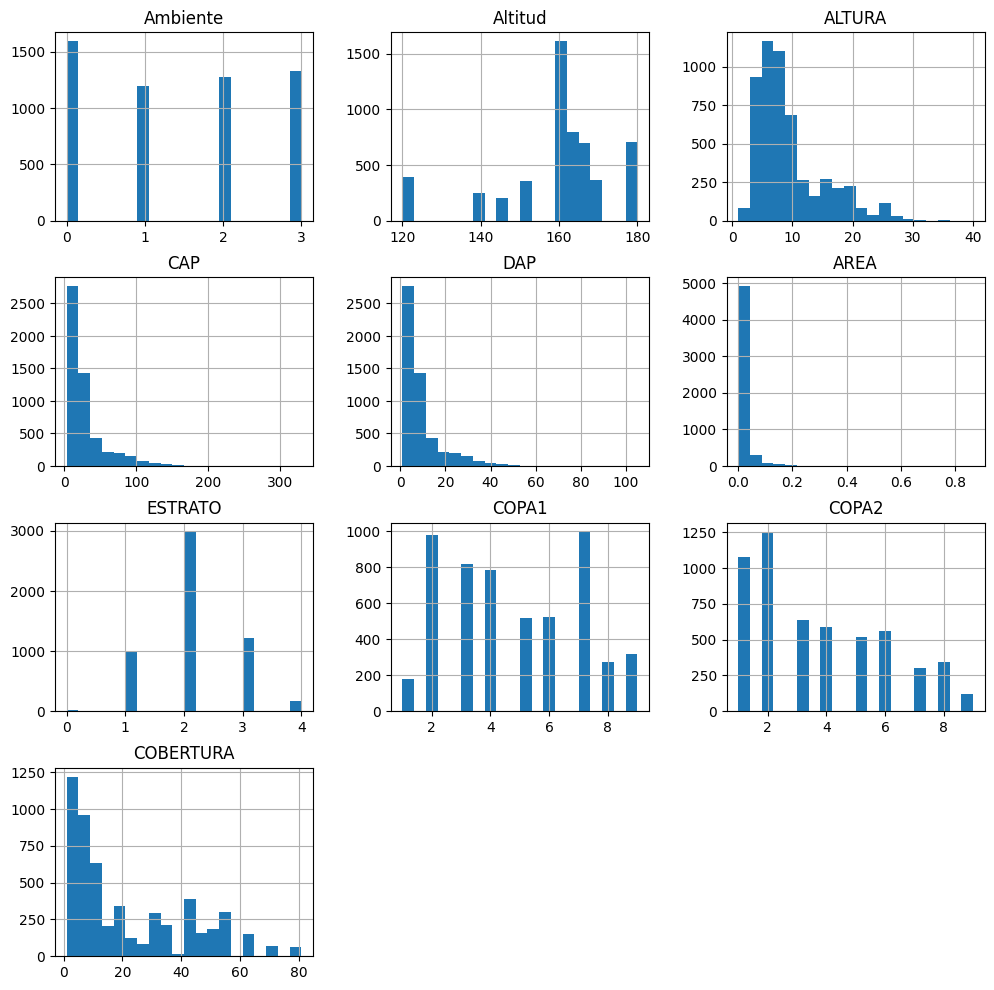

In [ ]:
df.hist(bins=20, figsize=(12, 12))
plt.show()

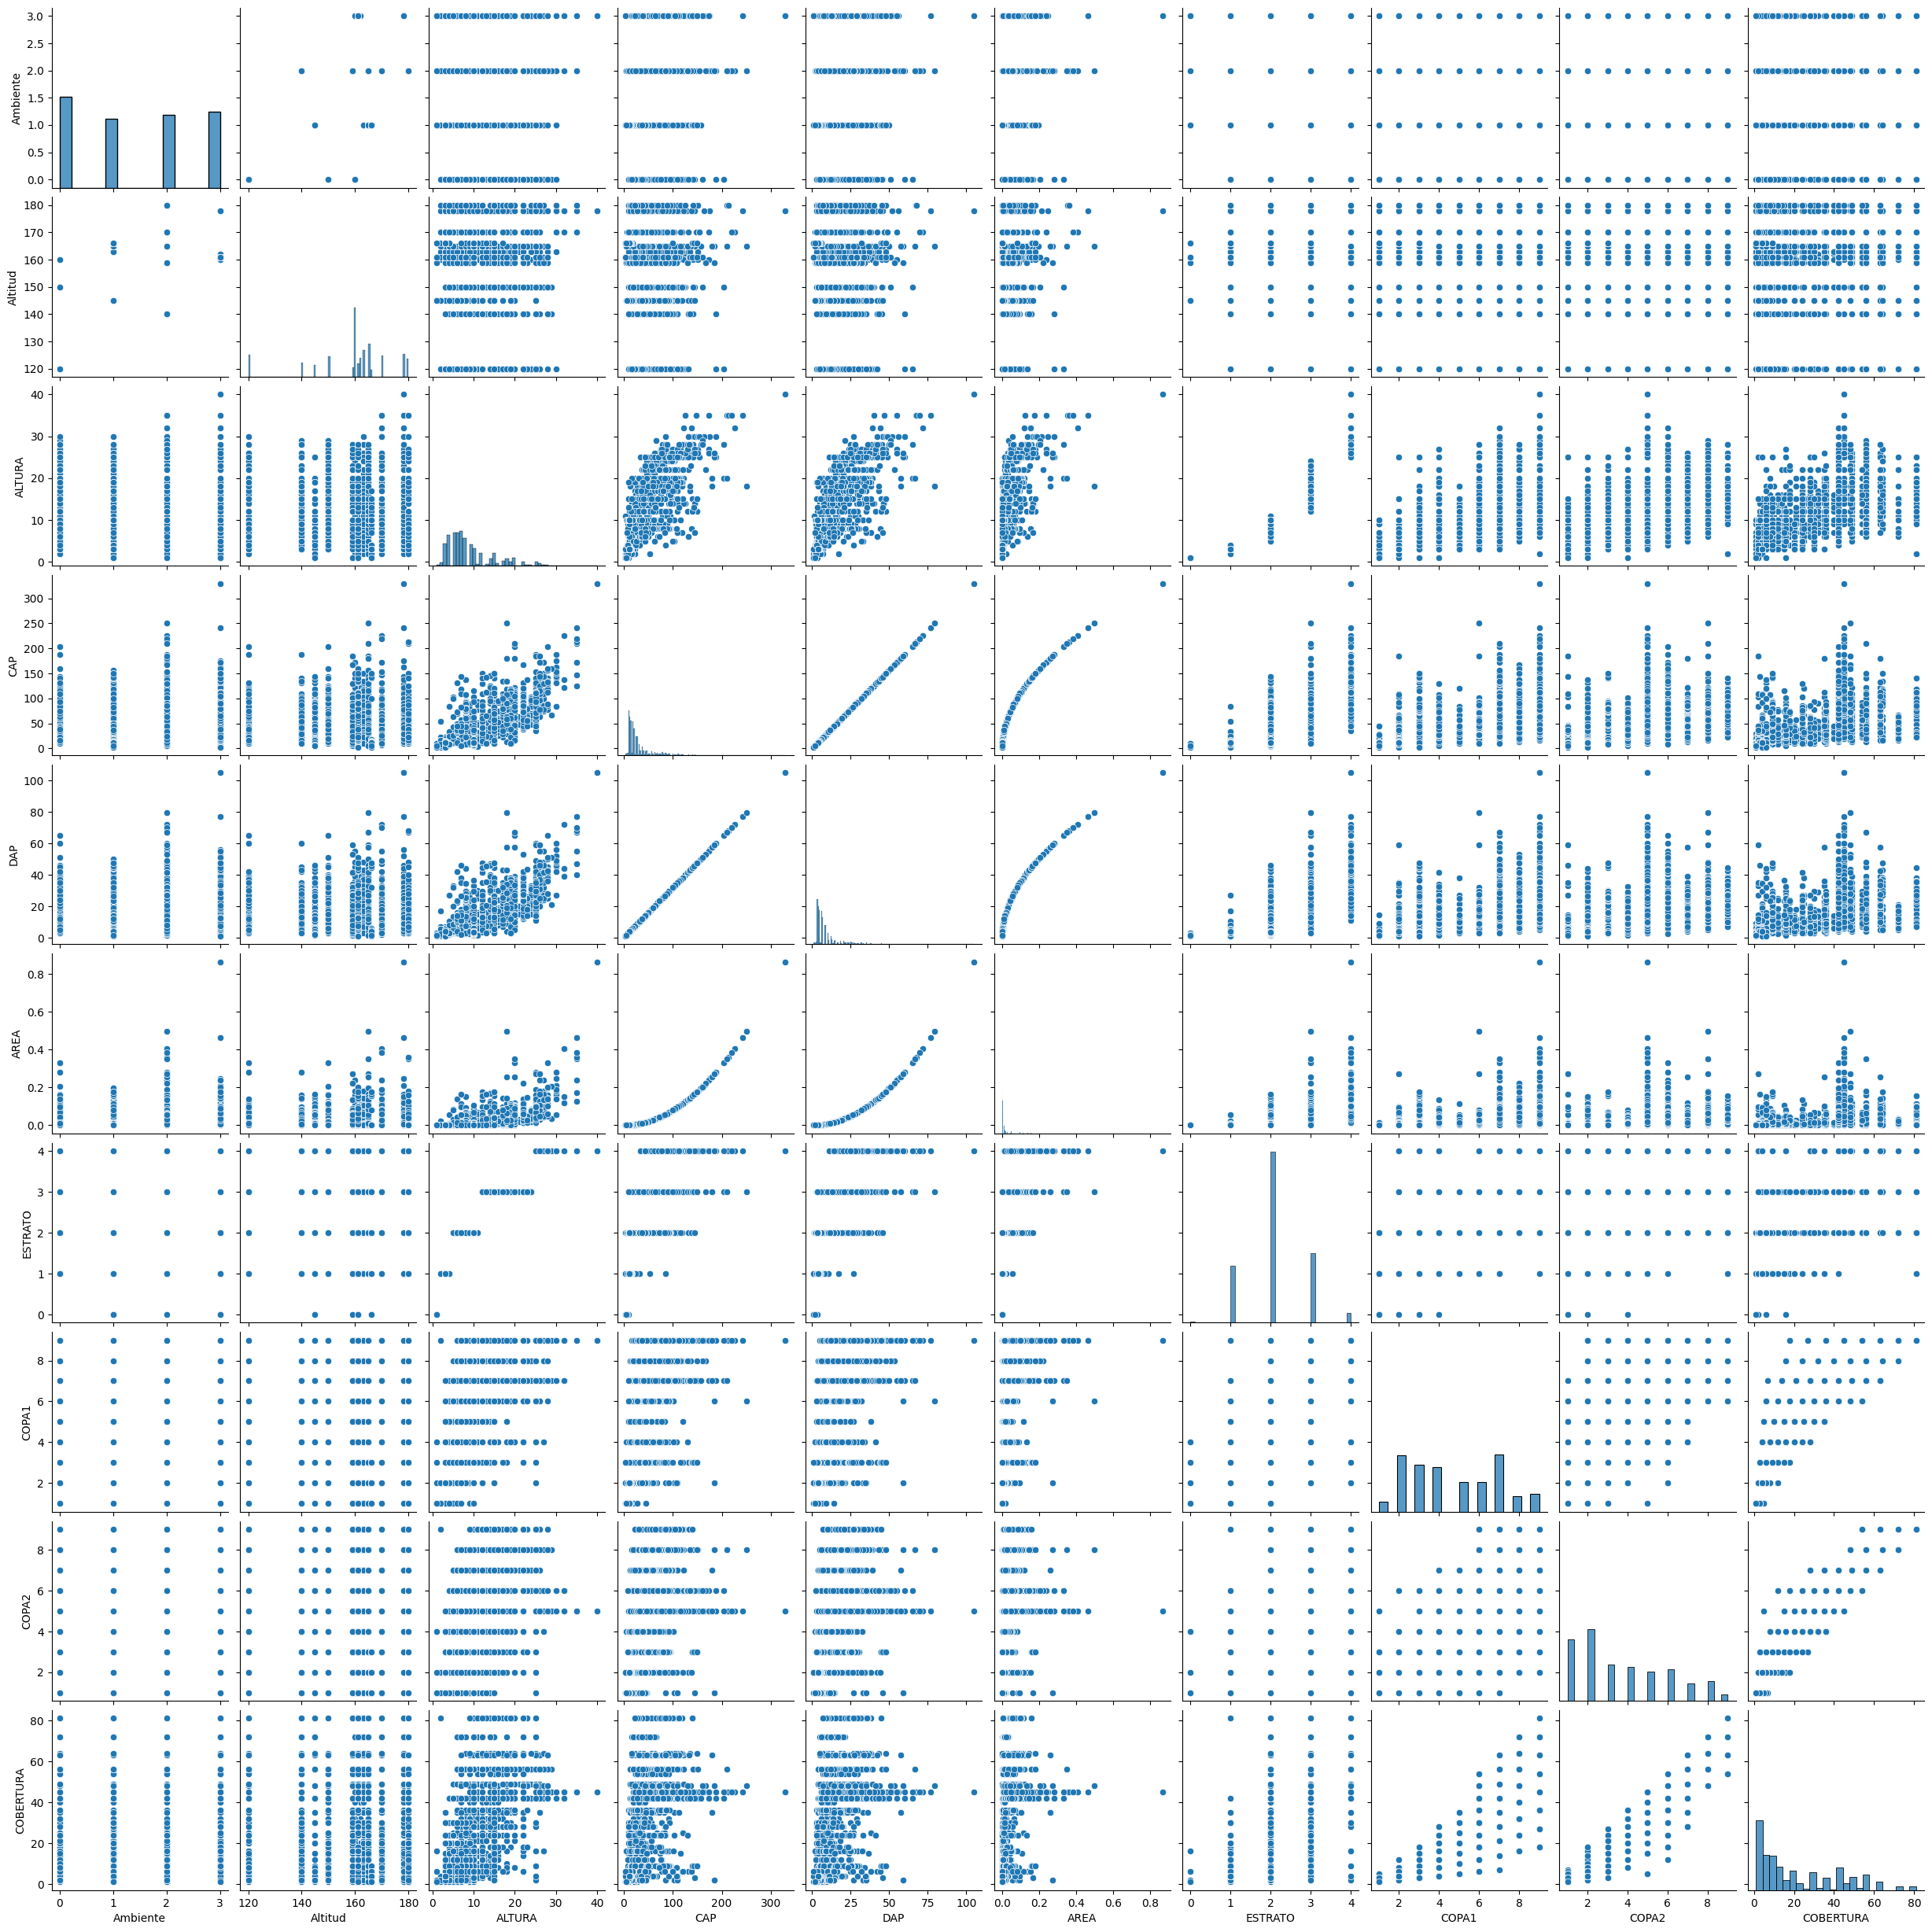

In [ ]:
sns.pairplot(df)
plt.show()

<ipython-input-11-85ce0baa2e1f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


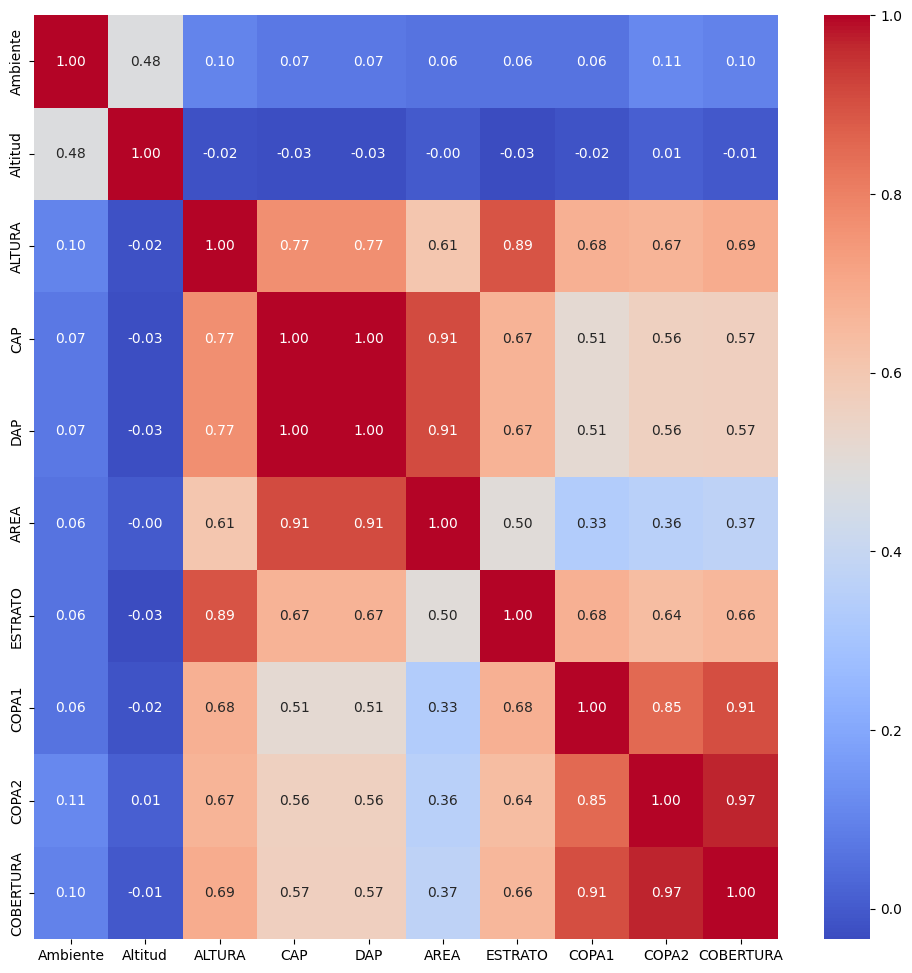

In [ ]:
correlation_matrix = df.corr()
plt.figure(figsize=(12,12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()